In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

file_path = "Resources/ufo_sightings_scrubbed.csv"
ufo_file = pd.read_csv(file_path)
ufo_file.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [15]:

ufo_file = ufo_file.dropna(how='any')
ufo_file = ufo_file.loc[ufo_file['country']== 'us',:]
ufo_file["country"].value_counts()
ufo_file.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [13]:
ufo_file.head()
ufo_file["datetime"].value_counts()

7/4/2010 22:00      31
7/4/2012 22:00      29
11/16/1999 19:00    24
7/4/2010 21:00      23
9/19/2009 20:00     23
7/4/2011 22:00      22
10/31/2004 20:00    22
7/4/2013 22:00      20
7/4/2012 22:30      20
11/16/1999 18:05    19
7/4/2010 23:00      18
7/4/2013 22:30      18
9/19/2009 19:50     18
11/16/1999 19:05    18
9/30/2005 23:00     18
7/4/2010 21:30      17
7/4/2010 22:30      16
7/4/2012 21:30      15
1/1/2014 00:00      15
7/4/2013 21:30      15
7/4/2009 22:00      14
8/31/2004 21:00     14
11/16/1999 18:00    13
7/4/1997 21:30      13
3/13/1997 20:30     12
7/4/2012 21:00      12
11/16/1999 19:10    12
9/22/2005 19:30     12
12/10/2007 19:00    11
7/4/2013 21:00      11
                    ..
12/31/2013 19:30     1
4/24/2000 19:52      1
7/14/2013 23:40      1
1/16/2007 12:00      1
10/26/1999 06:00     1
5/22/1993 21:00      1
9/26/2004 20:43      1
6/13/2004 11:30      1
7/6/2004 10:35       1
10/31/2008 08:30     1
10/14/1999 22:50     1
10/8/2009 10:00      1
3/20/1999 0

In [33]:
# split datetime column by "/"
split_datetime = ufo_file["datetime"].str.rsplit("/", n=1, expand=True)
# split year and time by " "
split_datetime = split_datetime[1].str.rsplit(" ", n=1, expand=True)
split_datetime.head()

,0,1
0,1949,20:30
3,1956,21:00
4,1960,20:00
5,1961,19:00
7,1965,23:45


Text(0, 0.5, 'Number of Sightings')

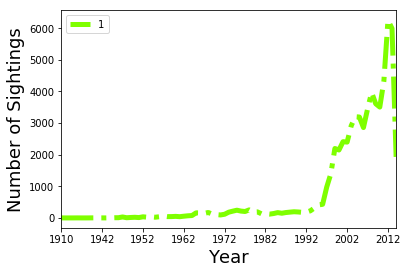

In [94]:

sighting_year = split_datetime.groupby([0]).count()
sighting_year = sighting_year.astype(float)

sighting_year.cumsum()
sighting_year.plot(color='Chartreuse', linestyle='-.', linewidth=5)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Sightings', fontsize=18)
